# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

In [9]:
from importlib import reload
import maddpg
reload(maddpg)
from maddpg import MADDPG
import torch
from collections import deque

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [3]:
env = UnityEnvironment(file_name="/Users/olivierharel/Desktop/udacity/deep-reinforcement-learning/p3_collab-compet/Tennis.app")

Mono path[0] = '/Users/olivierharel/Desktop/udacity/deep-reinforcement-learning/p3_collab-compet/Tennis.app/Contents/Resources/Data/Managed'
Mono config path = '/Users/olivierharel/Desktop/udacity/deep-reinforcement-learning/p3_collab-compet/Tennis.app/Contents/MonoBleedingEdge/etc'


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print('The state for the second agent looks like:', states[1])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
The state for the second agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.4669857  -1.5
  0.          0.         -6.83172083  6.          0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [ ]:

for i in range(1,6):                                     # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        actions[1,:] = actions[0,:]
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))


When finished, you can close the environment.

In [10]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
# Instantiate MADDPG
maddpg = MADDPG(num_agents, state_size, 3, action_size, random_seed=0, use_bn=False,
                buffer_size_init = int(1e5), buffer_size_final = int(1e6), gamma = 0.99,
                epsilon_init = 1.0, epsilon_min = 1e-2, epsilon_decay = 0.99,
                tau_init = 1e-2, tau_min = 1e-3, tau_decay = 0.985
                )

In [7]:
def train_maddpg(n_episodes=200, tgt_score=[1.5,2.5,1.5], max_t=3000, trailing_average_period=100, update_period=1, training_per_update_sch=[10,2,0.05]):
    best_episode_score_since_last_update = -max_t
    best_mean_score = -max_t
    best_mean_score_was_updated = False
    scores_deque = deque(maxlen=trailing_average_period)
    mean_scores = []
    scores = []
    training_per_update = training_per_update_sch[0]
    agent_tags = np.array([1, -1]).reshape((num_agents,1))
    print("Training targets:")
    print("- Run a minimum of 300 episodes")
    print("- Successful stop when episode score > {} and {}-last-episodes trailing score average > {}".format(
        tgt_score[1], trailing_average_period, tgt_score[2] 
    ))
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
        states = env_info.vector_observations                 # get the current state (for each agent)
        maddpg.reset()                                        # reset each agent's noise generator
        ep_scores = np.zeros(num_agents)                      # initialize the score (for each agent)
        for t in range(max_t):
            actions = maddpg.act(states, add_noise=True)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            n_train = training_per_update if ((t%update_period) == 0) else 0
            maddpg.step(states, actions, rewards, next_states, dones, n_train)
            ep_scores += rewards
            states = next_states
            if np.any(dones):
                break 

        maddpg.decay_epsilon()

        # Training per update scheduler
        nxt_training_per_update = max(training_per_update_sch[1], round(training_per_update_sch[0] - i_episode*training_per_update_sch[2]))
        if (nxt_training_per_update != training_per_update):
            print("Decreasing #trainings per update to: {}".format(nxt_training_per_update))
        training_per_update = nxt_training_per_update

        # Average score
        max_score  = np.max(ep_scores)
        best_episode_score_since_last_update = max(max_score, best_episode_score_since_last_update)
        if max_score > tgt_score[0]:
            maddpg.decay_tau()
            # The first time max_score > tgt_score[0], we increase the buffer size
            # Gathered experience is then considered more meaningful and the increased size
            # is expected to stabilize training
            maddpg.switch_replay_buffer_size() 

        scores_deque.append(max_score)
        trailing_mean_score = np.mean(scores_deque)
        scores.append(max_score)
        mean_scores.append(trailing_mean_score)
        if (i_episode % 10 == 0) and best_mean_score_was_updated:
            best_mean_score_was_updated = False
            print('\rEpisode {} | {}-last-episodes trailing score average: {:.3f} | Current best average: {:.3f} | Best episode score since last update: {:.3f}'.format(
                   i_episode, trailing_average_period, np.mean(trailing_mean_score), best_mean_score, best_episode_score_since_last_update))
            best_episode_score_since_last_update = -max_t


        # Save weights
        if trailing_mean_score > best_mean_score:
            best_mean_score_was_updated = True
            torch.save(maddpg.normalizer_local.state_dict(), 'checkpoint_normalizer.pth')
            torch.save(maddpg.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(maddpg.critic_local.state_dict(), 'checkpoint_critic.pth')
            best_mean_score = trailing_mean_score
        
        # Test for completion
        if (max_score > tgt_score[1] and trailing_mean_score > tgt_score[2]) and (i_episode >= 300):
            print("MADDPG training complete")
            print("Best averaged score achieved: {:.2f}".format(best_mean_score))
            break
            
    return mean_scores, scores

In [8]:
mean_scores, scores = train_maddpg(n_episodes = 2000, tgt_score=[1.5,2.5,1.25])
env.close()


Training targets:
- Run a minimum of 300 episodes
- Successful stop when episode score > 2.5 and 100-last-episodes trailing score average > 1.25
Episode 10 | 100-last-episodes trailing score average: 0.000 | Current best average: 0.000 | Best episode score since last update: 0.000
Decreasing #trainings per update to: 9
Episode 20 | 100-last-episodes trailing score average: 0.005 | Current best average: 0.006 | Best episode score since last update: 0.100
Decreasing #trainings per update to: 8
Episode 30 | 100-last-episodes trailing score average: 0.007 | Current best average: 0.008 | Best episode score since last update: 0.100
Episode 40 | 100-last-episodes trailing score average: 0.010 | Current best average: 0.011 | Best episode score since last update: 0.100
Episode 50 | 100-last-episodes trailing score average: 0.018 | Current best average: 0.016 | Best episode score since last update: 0.100
Decreasing #trainings per update to: 7
Episode 60 | 100-last-episodes trailing score average

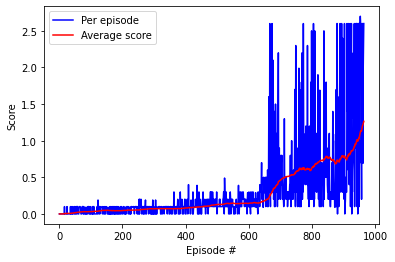

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores, color='b',label='Per episode')
plt.plot(np.arange(1, len(mean_scores)+1), mean_scores, color='r', label='Average score')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend()
plt.show()

The normalizer coefficients printed below (each column maps to each agent) show that state variables #0, #1, #2, $#6 are shared
by the agents why they have opposite perspectives (opposite signs) on variables #3, #4, #5, and #7.

In [17]:
print(torch.load('checkpoint_normalizer.pth')['fc.weight'].data.cpu())

tensor([[ 1.0472,  1.1035],
        [-1.0080, -1.0143],
        [ 1.0028,  1.0003],
        [-1.0086,  0.9990],
        [-0.9130,  0.8948],
        [ 0.9527, -0.9373],
        [-1.0050, -1.0078],
        [-1.0085,  0.9990]])


### 5. Replay of trained actor (multi agent)

In [ ]:
maddpg = MADDPG(num_agents, state_size, 3, action_size, 0)
maddpg.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
maddpg.normalizer_local.load_state_dict(torch.load('checkpoint_normalizer.pth'))

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
maddpg.reset()                                        # reset each agent's noise generator
scores_replay = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = maddpg.act(states, add_noise=False)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores_replay += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores_replay)))
